In [1]:
from data_util_NN import load_CIFAR10, load_Mnist
import numpy as np
from NN_2Layers import NN   #模型
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
data_path = r"E:\Code\jupyterpy\DigitalVideo\datasets\mnist"

In [3]:
X_train, y_train, X_test, y_test = load_Mnist(data_path)
print("X_train: {} \t y_train: {}".format(X_train.shape, y_train.shape))
print("X_test: {} \t y_test: {}".format(X_test.shape, y_test.shape))

X_train: (60000, 784) 	 y_train: (60000,)
X_test: (10000, 784) 	 y_test: (10000,)


* One hot

In [4]:
y_train = np.eye(10)[y_train.flatten()]
y_test = np.eye(10)[y_test.flatten()]

In [5]:
mask = range(60000)
X_tr = X_train[mask]
y_tr = y_train[mask]
mask = range(10000)
X_te = X_test[mask]
y_te = y_test[mask]
print("X_train:{} \t y_train: {}".format(X_tr.shape, y_tr.shape))
print("X_test: {} \t y_test: {}".format(X_te.shape, y_te.shape))

X_train:(60000, 784) 	 y_train: (60000, 10)
X_test: (10000, 784) 	 y_test: (10000, 10)


In [6]:
def normalize(X):
    X = (X - np.mean(X, 1, keepdims=True)) / np.std(X, 1, keepdims=True)
    return X

In [7]:
xs = normalize(X_tr)
ys = y_tr
X_te = normalize(X_te)

In [8]:
batch_size = 4000
xs, X_val, ys, y_val = train_test_split(xs, ys, test_size=0.2, random_state=42)
n_batch = xs.shape[0] // batch_size
n_batch_val = X_val.shape[0] // batch_size
print("Numbers of training batch size: ", n_batch)
print("Numbers of val batch size: ", n_batch_val)

Numbers of training batch size:  12
Numbers of val batch size:  3


* 权重初始化

In [9]:
def creat_weights(shape, check_loss=False):
    if check_loss:
        W = np.zeros(shape)
    else:
        epsilon_init = 0.12
        W = np.random.rand(*(shape)) * 2 * epsilon_init - epsilon_init
        #W =  0.01 * np.random.randn(*(shape))
    return W
def creat_bias(shape):
    b = 0.1 * np.ones(shape).reshape(1, -1)
    return b

* Loss checking

In [10]:
input_dim = 784 #输入数据维度
L1 = 25 #全连接层1
L2 = 25 #全连接层2
num_labels = 10 #10分类

In [11]:
model = NN(784, 25, 25, 10)

In [12]:
NN.W_fc1 = creat_weights([input_dim, L1], check_loss=True)
NN.b_fc1 = creat_bias([L1])
NN.W_fc2 = creat_weights([L1, L2], check_loss=True)
NN.b_fc2 = creat_bias([L2])
NN.W_ys = creat_weights([L2, num_labels], check_loss=True)
NN.b_ys = creat_bias([num_labels])

In [13]:
loss = model.train(xs, ys, 1e-3)
print("Loss of zero grad: ", loss[0])

Loss of zero grad:  2.30258509299


* Train

In [14]:
model = NN(784, 25, 25, 10)
NN.W_fc1 = creat_weights([input_dim, L1], check_loss=False)
NN.b_fc1 = creat_bias([L1])
NN.W_fc2 = creat_weights([L1, L2], check_loss=False)
NN.b_fc2 = creat_bias([L2])
NN.W_ys = creat_weights([L2, num_labels], check_loss=False)
NN.b_ys = creat_bias([num_labels])

In [15]:
epoch_loss_list = []
epoch_acc_list = []
epoch_loss_val_list = []
epoch_acc_val_list = []
n_epoch = 200
import time
print(time.strftime('%H:%M:%S', time.localtime(time.time())))
print("Numbers of epoch size: ", n_epoch)
print("Numbers of batch size: ", n_batch)
for epoch in range(n_epoch):
    epoch_loss = 0.0
    epoch_acc = 0.0
    epoch_loss_val = 0.0
    epoch_acc_val = 0.0
    
    for i in range(n_batch):
        loss = model.train(xs[i * batch_size:(i+1) * batch_size], ys[i * batch_size:(i+1) * batch_size], learning_rate=0.42, reg=1)
        epoch_loss += model.loss
        epoch_acc += model.acc

    for i in range(n_batch_val):
        acc_val, loss_val = model.test(X_val[i * batch_size:(i+1) * batch_size], y_val[i * batch_size:(i+1) * batch_size])
        epoch_loss_val += loss_val
        epoch_acc_val += acc_val
    epoch_loss /= n_batch
    epoch_acc /= n_batch
    epoch_loss_val /= n_batch_val
    epoch_acc_val /= n_batch_val
    epoch_loss_list.append(epoch_loss)
    epoch_acc_list.append(epoch_acc)
    epoch_loss_val_list.append(epoch_loss_val)
    epoch_acc_val_list.append(epoch_acc_val)
    print("epoch {0} / {1:}\t:Train loss {2:.5f}\t Train acc {3:.5f} \
    \t:Val loss {4:.5f}\t Val acc {5:.5f}".format(epoch, n_epoch, epoch_loss, epoch_acc, epoch_loss_val, epoch_acc_val))
print(time.strftime('%H:%M:%S', time.localtime(time.time())))

15:48:15
Numbers of epoch size:  200
Numbers of batch size:  12
epoch 0 / 200	:Train loss 2.36552	 Train acc 0.11010     	:Val loss 2.30105	 Val acc 0.11583
epoch 1 / 200	:Train loss 2.31341	 Train acc 0.13546     	:Val loss 2.30028	 Val acc 0.12542
epoch 2 / 200	:Train loss 2.31257	 Train acc 0.15288     	:Val loss 2.29941	 Val acc 0.14283
epoch 3 / 200	:Train loss 2.31159	 Train acc 0.17900     	:Val loss 2.29834	 Val acc 0.17158
epoch 4 / 200	:Train loss 2.31037	 Train acc 0.21204     	:Val loss 2.29700	 Val acc 0.20583
epoch 5 / 200	:Train loss 2.30882	 Train acc 0.25017     	:Val loss 2.29524	 Val acc 0.24758
epoch 6 / 200	:Train loss 2.30677	 Train acc 0.29110     	:Val loss 2.29287	 Val acc 0.29283
epoch 7 / 200	:Train loss 2.30400	 Train acc 0.33267     	:Val loss 2.28961	 Val acc 0.33900
epoch 8 / 200	:Train loss 2.30015	 Train acc 0.37327     	:Val loss 2.28501	 Val acc 0.37858
epoch 9 / 200	:Train loss 2.29468	 Train acc 0.40719     	:Val loss 2.27838	 Val acc 0.41733
epoch 

* Test

In [16]:
test_acc, test_loss = model.test(X_te, y_te)
print("Test acc: ", test_acc)

Test acc:  0.9212


* 训练过程

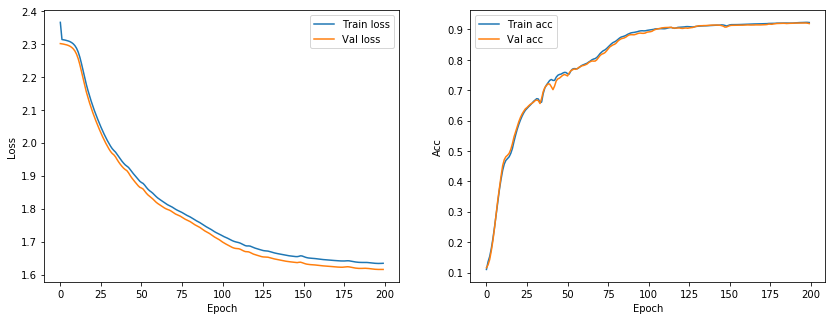

In [17]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(epoch_loss_list, label='Train loss')
plt.plot(epoch_loss_val_list, label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc=0)

plt.subplot(122)
plt.plot(epoch_acc_list, label='Train acc')
plt.plot(epoch_acc_val_list, label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend(loc=0)
plt.show()